# Animal Adoption Trends in Texas

### Long Wang, Tian Li, and Wensen Lin

## Introduction

Animal welfare is an important issue that affects millions of animals across the United States. One key aspect of animal welfare is animal adoption, which helps to provide loving homes for animals in need and reduces the number of animals in shelters. In Texas, animal adoption is an important issue that has garnered significant attention in recent years. Understanding animal adoption trends in Texas can provide valuable insights into how to improve animal welfare in the state.

This data science project aims to analyze animal adoption trends in Austin, Texas using data from data.austintexas.gov. By examining factors such as the type of animal, location, and adoption process, we aim to identify any patterns or trends in adoption rates over time. Our research question is:

What are the animal adoption trends in Texas, and how do they vary based on factors such as the type of animal, location, and adoption process?

Our analysis will contribute to the existing literature on animal welfare in Texas by providing insights into the factors that affect animal adoption rates in the state. We hope our findings will be helpful to animal shelters, rescue organizations, and policymakers working to improve animal welfare in Texas and across the country.

## Data Source:

- Austin Animal Center Outcomes csv: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

- Austin Animal Center Intakes csv: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm

- AAHA cat age category: https://www.aaha.org/aaha-guidelines/life-stage-feline-2021/feline-life-stage-definitions/#:~:text=The%20Task%20Force%20has%20designated,can%20occur%20at%20any%20age.

## Part 1: Data Collection

### Libraries

The tools we gonna use in this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
!pip install statsmodels
from statsmodels.formula.api import ols

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


### Grab Data

To start up the project, first, we need to grab the data into our workshop. All the data are grabbed from Austin Animal Center offical website.  It is hard to read the data directly from the website, so we downloaded data in CSV form and import them to our workshop. After that, we use pandas to read the CSV file and build the tables.

In this project, we gonna use 2 tables: intakes table and outcomes table. 
Intakes table represent the status of animals as they arrive at the Animal Center, while outcomes table represent the status of animals as they leave the Animal Center. 
We need gonna merge those table by inner join, with unique key 'Animal ID'. This will make table more readable and more easy for us to use the data. 

In [2]:
# grabbing outcomes data 
data1 = pd.read_csv("Austin_Animal_Center_Outcomes.csv", sep=',')
data1 = data1.sort_values(by=['DateTime'])
data1.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
103252,A669926,NaN,01/01/2014 01:00:00 PM,Jan 2014,05/30/2013,Transfer,Partner,Dog,Intact Female,7 months,Plott Hound/Black/Tan Hound,Brown/Tan
42428,A670044,NaN,01/01/2014 01:13:00 PM,Jan 2014,01/01/2011,Euthanasia,Suffering,Cat,Intact Male,3 years,Domestic Shorthair Mix,Blue
112646,A668314,Duke,01/01/2014 01:30:00 PM,Jan 2014,12/02/2012,Transfer,Partner,Dog,Neutered Male,1 year,Labrador Retriever Mix,Chocolate/White
86873,A666770,Josh,01/01/2014 01:32:00 PM,Jan 2014,11/07/2010,Adoption,NaN,Dog,Neutered Male,3 years,Siberian Husky Mix,Black/Brown
75329,A668337,*Tony,01/01/2014 01:42:00 PM,Jan 2014,12/02/2012,Euthanasia,Behavior,Dog,Intact Male,1 year,Pit Bull Mix,Brown Brindle/White


In [3]:
# grabbing intakes data
data2 = pd.read_csv("Austin_Animal_Center_Intakes.csv", sep=',')
data2 = data2.sort_values(by=['DateTime'])
data2.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
38402,A670057,Brownie,01/01/2014 01:05:00 PM,January 2014,S Lamar And Ben White in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Chow Chow Mix,Red
28360,A670059,NaN,01/01/2014 01:31:00 PM,January 2014,11402 Robert Wooding in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,West Highland,White
110842,A670061,Koda,01/01/2014 01:33:00 PM,January 2014,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,2 years,Chow Chow Mix,Red
55803,A670064,NaN,01/01/2014 01:57:00 PM,January 2014,Gunter St And Gonzalez in Austin (TX),Stray,Normal,Dog,Intact Female,3 months,Pit Bull/Pit Bull,Red
47301,A670065,Muneca,01/01/2014 02:11:00 PM,January 2014,Applewood Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Australian Shepherd/Chow Chow,Red/White


In [4]:
# Marge the table
data = data1.merge(data2, how = "inner", left_on = ["Animal ID"], right_on = ["Animal ID"])
data.head()

,Animal ID,Name_x,DateTime_x,MonthYear_x,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_x,Sex upon Outcome,Age upon Outcome,...,DateTime_y,MonthYear_y,Found Location,Intake Type,Intake Condition,Animal Type_y,Sex upon Intake,Age upon Intake,Breed_y,Color_y
0,A669926,NaN,01/01/2014 01:00:00 PM,Jan 2014,05/30/2013,Transfer,Partner,Dog,Intact Female,7 months,...,12/30/2013 02:27:00 PM,December 2013,12815 New Katy in Manor (TX),Stray,Sick,Dog,Intact Female,7 months,Plott Hound/Black/Tan Hound,Brown/Tan
1,A670044,NaN,01/01/2014 01:13:00 PM,Jan 2014,01/01/2011,Euthanasia,Suffering,Cat,Intact Male,3 years,...,01/01/2014 11:51:00 AM,January 2014,9038 Wellesley in Travis (TX),Stray,Injured,Cat,Intact Male,3 years,Domestic Shorthair Mix,Blue
2,A668314,Duke,01/01/2014 01:30:00 PM,Jan 2014,12/02/2012,Transfer,Partner,Dog,Neutered Male,1 year,...,12/02/2013 08:00:00 AM,December 2013,183 & Duval in Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Labrador Retriever Mix,Chocolate/White
3,A668314,Duke,01/01/2014 01:30:00 PM,Jan 2014,12/02/2012,Transfer,Partner,Dog,Neutered Male,1 year,...,12/29/2013 11:42:00 AM,December 2013,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,1 year,Labrador Retriever Mix,Chocolate/White
4,A668314,Duke,12/27/2013 06:01:00 PM,Dec 2013,12/02/2012,Adoption,NaN,Dog,Neutered Male,1 year,...,12/02/2013 08:00:00 AM,December 2013,183 & Duval in Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Labrador Retriever Mix,Chocolate/White


### Clean Data

After import and merge the data, we found there are multiple replicate column, some of them are needed (intakes/outcomes date), but some of them are repeate values (name, breed, etc.)
So next step here we gonna drop the columns that is not needed, rename the column to make it more clear, and elimate the null/unknow data. We also gonna reorder the column and change some of the column data type to make our next steps easier.

In [5]:
# Drop the repeate columns and the columns that we are not gonna use in our project
data = data.drop(['MonthYear_x','Date of Birth','Outcome Subtype', 'Name_y', 'MonthYear_y','Found Location',\
                'Animal Type_y', 'Breed_y', 'Color_y'], 1)

In [6]:
# Rename the column to make it more clear 
data = data.rename(columns={'Name_x': 'Name', 'DateTime_x': 'Outcome Date', 'Animal Type_x': 'Animal Type',\
        'Sex upon Outcome': 'Outcome Sex', 'Age upon Outcome': 'Outcome Age', 'Breed_x': 'Breed', \
        'Color_x':'Color', 'DateTime_y': 'Intake Date', 'Sex upon Intake': 'Intake Sex', \
        'Age upon Intake': 'Intake Age'})

# Reorder the columns to make it more readable
data = data[['Animal ID', 'Name', 'Animal Type', 'Breed', 'Color', 'Intake Condition',\
'Intake Date', 'Outcome Date', 'Intake Type', 'Outcome Type','Intake Sex', 'Outcome Sex', 'Intake Age',\
'Outcome Age']]

data.head()

,Animal ID,Name,Animal Type,Breed,Color,Intake Condition,Intake Date,Outcome Date,Intake Type,Outcome Type,Intake Sex,Outcome Sex,Intake Age,Outcome Age
0,A669926,NaN,Dog,Plott Hound/Black/Tan Hound,Brown/Tan,Sick,12/30/2013 02:27:00 PM,01/01/2014 01:00:00 PM,Stray,Transfer,Intact Female,Intact Female,7 months,7 months
1,A670044,NaN,Cat,Domestic Shorthair Mix,Blue,Injured,01/01/2014 11:51:00 AM,01/01/2014 01:13:00 PM,Stray,Euthanasia,Intact Male,Intact Male,3 years,3 years
2,A668314,Duke,Dog,Labrador Retriever Mix,Chocolate/White,Normal,12/02/2013 08:00:00 AM,01/01/2014 01:30:00 PM,Stray,Transfer,Intact Male,Neutered Male,1 year,1 year
3,A668314,Duke,Dog,Labrador Retriever Mix,Chocolate/White,Normal,12/29/2013 11:42:00 AM,01/01/2014 01:30:00 PM,Owner Surrender,Transfer,Neutered Male,Neutered Male,1 year,1 year
4,A668314,Duke,Dog,Labrador Retriever Mix,Chocolate/White,Normal,12/02/2013 08:00:00 AM,12/27/2013 06:01:00 PM,Stray,Adoption,Intact Male,Neutered Male,1 year,1 year


In [7]:
# Remove specfic character in animal name. 
data['Name'] = data['Name'].replace(r'[*]+', ' ', regex=True)

# Filter the data, drop null and invalid values

# drop null value
data.drop(data[(data['Outcome Sex'].str.lower() == 'unknown') | (data['Intake Sex'].str.lower() == 'unknown') \
        | (data['Outcome Sex'].str.lower() == 'null') | (data['Intake Sex'].str.lower() == 'null')].index, inplace=True)
data.dropna(subset=['Outcome Age', 'Intake Age', 'Outcome Date', 'Intake Age', 'Outcome Sex', 'Intake Sex',\
                    'Breed', 'Color', 'Outcome Type'], inplace=True)

# drop invalid values
data.drop(data[data["Outcome Age"].str.contains('-', regex=False)].index, inplace=True)


After we tidy the data, we found there are some replicate row with same Animal ID, which means those animal sent back to the animal center after they left. We don't want to overcount those animal so we gonna delete the replicate row also. 

In [8]:
# remove replicate rows
data = data.drop_duplicates(subset='Animal ID', keep="first")

We found that there are only small amout of bird and livestock data, we decide to category them to 'other animal type' as well. 

In [9]:
# category bird and livestock to 'other' animal type
data.loc[(data["Animal Type"].str.lower() == "bird") | (data["Animal Type"].str.lower() == "livestock"),\
         "Animal Type"] = "Other"

In [10]:
# Change column type to make life easier
data["Intake Date"] = pd.to_datetime(data["Intake Date"])
data["Outcome Date"] = pd.to_datetime(data["Outcome Date"])

We also gonna create a new column called: age group to category the age. 
The animal life spans vary greatly. In our project, we gonna do age analysis for cat and dog only, but not for other animals. 

The way we category the age is based the information on AAHA website: 

< 1 year    = Baby (kitty or puppy)
1 - 3 years = Teen 
3 - 7 years = Adult
7 + years   = Senior

In [11]:
# The animals that less than 1 year (end with month/day/week or 0 year) are baby
data.loc[(data["Outcome Age"].str.contains('month', regex=False)| \
        data["Outcome Age"].str.contains('day', regex=False)| \
        data["Outcome Age"].str.contains('week', regex=False) | \
        data["Outcome Age"].str.contains('0 year', regex=False)), 'Age Group'] = "Baby"

# The animals that between 1-3 year are teen
data.loc[data["Outcome Age"].str.contains(r'^[1-3] year', regex=True), 'Age Group'] = "Teen"

# The animals that between 3-7 year are adult
data.loc[data["Outcome Age"].str.contains(r'^[4-7] year', regex=True), 'Age Group'] = "Adult"

# The animals that between 7+ year are senior
data.loc[data["Outcome Age"].str.contains(r'^(8|9|\d\d) year', regex=True), 'Age Group'] = "Senior"
data.head()

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Animal ID,Name,Animal Type,Breed,Color,Intake Condition,Intake Date,Outcome Date,Intake Type,Outcome Type,Intake Sex,Outcome Sex,Intake Age,Outcome Age,Age Group
0,A669926,NaN,Dog,Plott Hound/Black/Tan Hound,Brown/Tan,Sick,2013-12-30 14:27:00,2014-01-01 13:00:00,Stray,Transfer,Intact Female,Intact Female,7 months,7 months,Baby
1,A670044,NaN,Cat,Domestic Shorthair Mix,Blue,Injured,2014-01-01 11:51:00,2014-01-01 13:13:00,Stray,Euthanasia,Intact Male,Intact Male,3 years,3 years,Teen
2,A668314,Duke,Dog,Labrador Retriever Mix,Chocolate/White,Normal,2013-12-02 08:00:00,2014-01-01 13:30:00,Stray,Transfer,Intact Male,Neutered Male,1 year,1 year,Teen
6,A666770,Josh,Dog,Siberian Husky Mix,Black/Brown,Injured,2013-11-07 07:46:00,2014-01-01 13:32:00,Stray,Adoption,Intact Male,Neutered Male,3 years,3 years,Teen
10,A668337,Tony,Dog,Pit Bull Mix,Brown Brindle/White,Normal,2013-12-02 13:10:00,2014-01-01 13:42:00,Stray,Euthanasia,Intact Male,Intact Male,1 year,1 year,Teen


### Create New Tables

In this project we gonna do a overall analysis, and analysis based on the species. We don't want to mess the tables up, so in below we gonna create new tables for different analysis. 

Overall - The table that contains all animals data. 
Cats - The table only contains cats information
Dogs - The table only contains dogs information
Other animals - The table only contains other animals information

In [12]:
overall = data.copy()

# Create new tables based on species
cat_table = data[data['Animal Type'] == 'Cat'].copy()
dog_table = data[data['Animal Type'] == 'Dog'].copy()
other_table = data[data['Animal Type'] == 'Other'].copy()

## Part 2: Data Visualization and Analysis for Overall Data

In this section, we will first plot the pie chart of outcome types, then show the outcomes animal across time, and linear regression to see the increase/decrease trend of overcoming animals. We will also plot a linear regression of adoption percentages over time to determine whether people are more/less willing to adopt animals over time.
Beside that we will use pie charts to visualize the percentage distribution of animal type, age, and sex for all adopted animals. This will help us understand which animal types/age groups/genders are most popular to adopt. 

### Outcomes Types Distribution

Because there are too any outcome types, and each label are overlapping, we decide to put the legends beside the pie graph

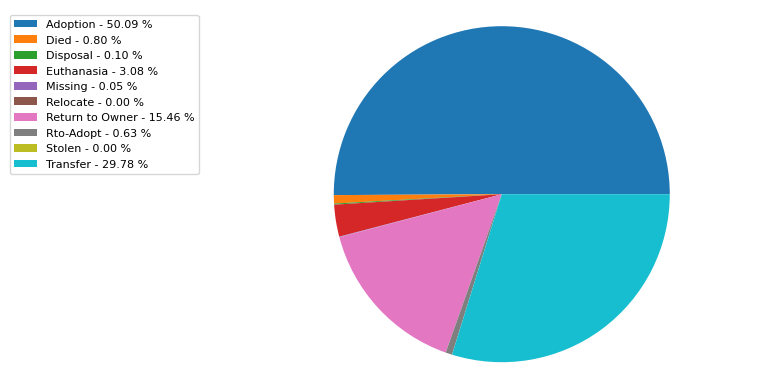

In [13]:
# Count the animal based on Outcome Type
count_t = overall.groupby(['Outcome Type'])['Outcome Type'].count().reset_index(name='percentage')

# Calculate the outcome type distribution by percentage (X.XX%)
percent = 100.*count_t['percentage']/count_t['percentage'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(count_t['Outcome Type'], percent)]

# draw pie graph
ax = count_t['percentage'].plot(kind='pie', labels=None)

# adjust the axis
ax.axis('equal') 
ax.yaxis.label.set_visible(False) 

# add the legend besides the pie graph
ax.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.show()

Based on the pie chart above, we can see over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners. Adoption is the majory way that animal left center, more than 50% of the animals are adopted. 

### Outcomes Trend Across Time 

The dataset only includees the data from Oct 2013 to Apr 2023. We decided to drop the data for year 2013 and year 2023 in overcomes trends graph, because they only have partial month data (incomplete). 

In [14]:
# Create a new column 'year' to determine which year that animal left the center
overall['Year'] = overall['Outcome Date'].dt.year

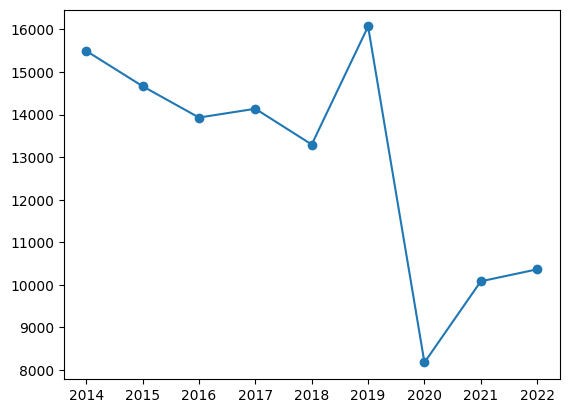

In [15]:
all_trend = overall.copy()

# Drop data before 1/1/2014 and data after 12/31/2022
all_trend.drop(all_trend[(all_trend['Outcome Date'].dt.date < datetime.date(2014, 1, 1)) | \
                        (all_trend['Outcome Date'].dt.date > datetime.date(2022, 12, 31)) \
                        ].index, inplace=True)

# Count the animal group by years 
all_animal = all_trend.groupby('Year')['Animal ID'].count().reset_index(name="count")

# Plot the graph
plt.plot(all_animal['Year'], all_animal['count'], '-o')

Overall, there is a downward trend in the number of animals leaving the centre. The number of animals leaving animal centers has dropped dramatically from 2019 to 2020. This may be affected by the pandemic, which has restricted people's movements (including adoptions and transfers). After 2020, the epidemic situation has been brought under control, and the number of animals leaving the center has gradually increased

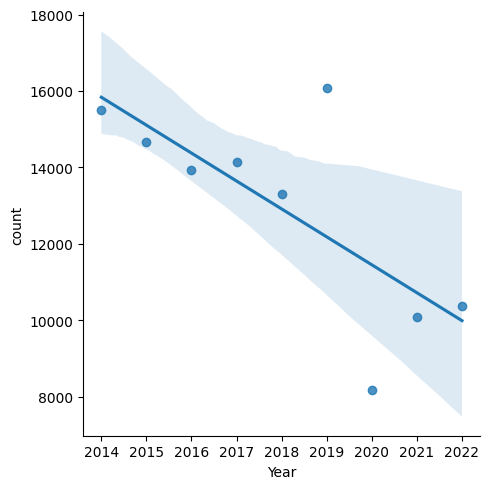

In [16]:
# Plot the linear regression
sns.lmplot(x='Year',y='count',data=all_animal,fit_reg=True) 

In [17]:
# Summery the data
ols(formula = "count ~ Year", data = all_animal).fit().params

Intercept    1.487566e+06
Year        -7.307500e+02
dtype: float64

Linear regression also showed a negative relationship between the number of animals leaving the center and year. Approximately 732 fewer animals leave the center each year.  

After analyzing the overall outcome trends, we would like to see a linear regression based on different animal types to see which animal numbers declined the most.

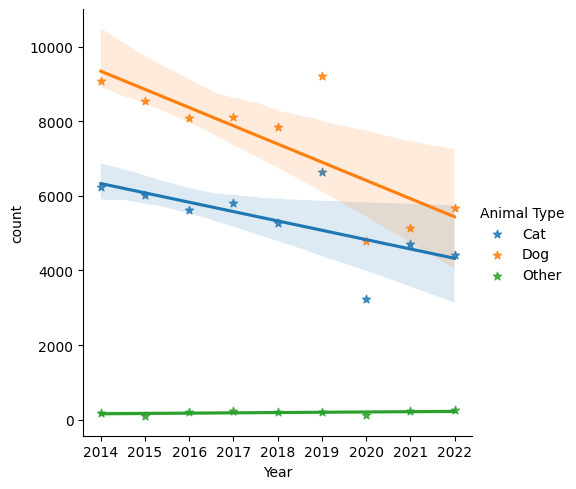

In [18]:
# Count the animal based on animal type group by year
diff_animal = all_trend.groupby(['Animal Type','Year'])['Animal ID'].count().reset_index(name="count")

# plot linear regression for different animal 
sns.lmplot(x="Year",
               y="count",
               hue="Animal Type",
               markers='*',
               data=diff_animal)

In [19]:
diff_animal = diff_animal.rename(columns={'Animal Type': 'Animal_Type'})
ols(formula = "count ~ Year * Animal_Type", data = diff_animal).fit().params

Intercept                    510972.866575
Animal_Type[T.Dog]           481204.244587
Animal_Type[T.Other]        -526556.677610
Year                           -250.566667
Year:Animal_Type[T.Dog]        -237.433333
Year:Animal_Type[T.Other]       258.383333
dtype: float64

In the graph above, we can see that dogs have the highest annual decline (about 488 fewer dogs leaving the center per year), followed by cats (about 250 fewer cats leaving the center per year).
But the number of other animals leaving the center is increasing each year (approximately 8 more animals leaving the center each year).

### Animal Type Distribution (Adopted)

In [20]:
# filter the data, only left adoption
all_adoption= all_trend[all_trend['Outcome Type'] == 'Adoption'].copy()

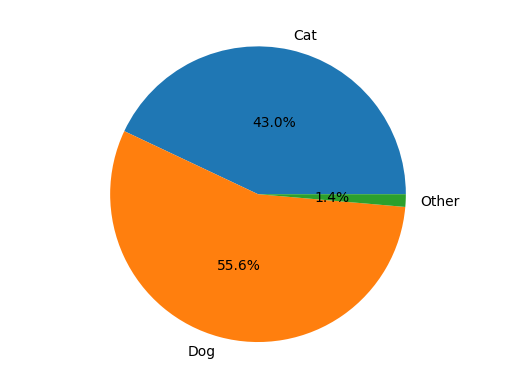

In [21]:
# Count the adopted animal based on Animal Type
count_a = all_adoption.groupby(['Animal Type'])['Animal Type'].count().reset_index(name='percentage')

# plot the pie chart (showing percentage)
fig, ax = plt.subplots()
ax.axis('equal')

patches, texts, autotexts = ax.pie(count_a['percentage'], 
                              labels=count_a['Animal Type'],
                              autopct='%1.1f%%', 
                              pctdistance=0.5, 
                              labeldistance=1.1)

The graph above shows that over 99% of adopted animals are cats/dogs. Among them, dogs are the most popular animals to adopt (accounting for about 57%). This means people are more likely to adopt dogs or cats than other animals (It may also be because other animals are rarer than cats and dogs).

### Age Group Distribution (Adopted)

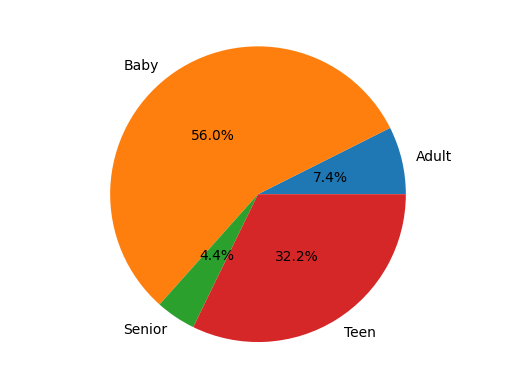

In [22]:
# Count the adopted animal based on Age Group
count_age = all_adoption.groupby(['Age Group'])['Age Group'].count().reset_index(name='percentage')

# Draw pie chart (showing percentage)
fig, ax = plt.subplots()
ax.axis('equal')

patches, texts, autotexts = ax.pie(count_age['percentage'], 
                              labels=count_age['Age Group'],
                              autopct='%1.1f%%', 
                              pctdistance=0.5, 
                              labeldistance=1.1)

The graph above shows that more than 88% of the animals that been adopted are baby/teen (under the age of 3). 56% of them are baby (under 1 years old). This shows that people prefer to adopt young animals

### Gender Distribution(Adopted)

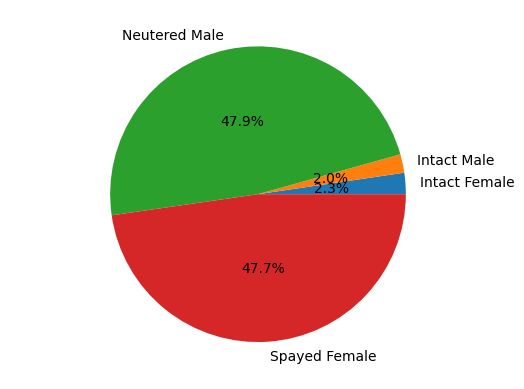

In [23]:
# Count the adopted animal based on outcome gender 
count_s = all_adoption.groupby(['Outcome Sex'])['Outcome Sex'].count().reset_index(name='percentage')

# Draw the pie chart (show percentage)
fig, ax = plt.subplots()
ax.axis('equal')

patches, texts, autotexts = ax.pie(count_s['percentage'], 
                              labels=count_s['Outcome Sex'],
                              autopct='%1.1f%%', 
                              pctdistance=0.5, 
                              labeldistance=1.1)

About 96 percent of animals are neutered before adoption. Half of the adopted animals are males and half are females. This means that people largely prefer to adopt neutered animals, but there is not much preference for gender

### Adoption Rate Across Time 

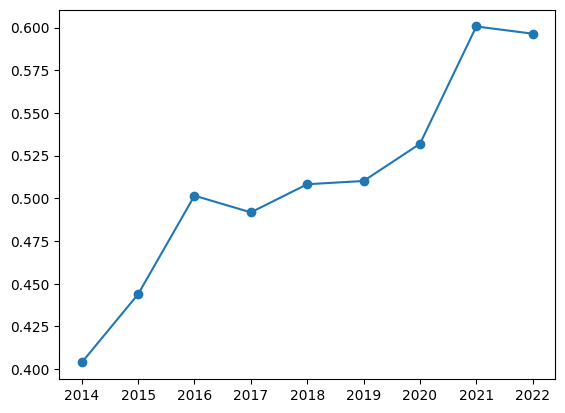

In [24]:
#  Count the adopted animal group by year
all_adoption = all_adoption.groupby('Year').size().reset_index(name='count')

# calculate the adopte rate over all outcome type
all_adoption['rate'] = all_adoption['count'] / all_animal['count']

# plot the graph
plt.plot(all_adoption['Year'], all_adoption['rate'], '-o')

Although the number of animals leaving the center has decreased year by year, the proportion of animals adopted over all outcome type has increased over years, especially in 2014-2016 and 2020-2021. There has been a slow decline in adoptions rate after 2021

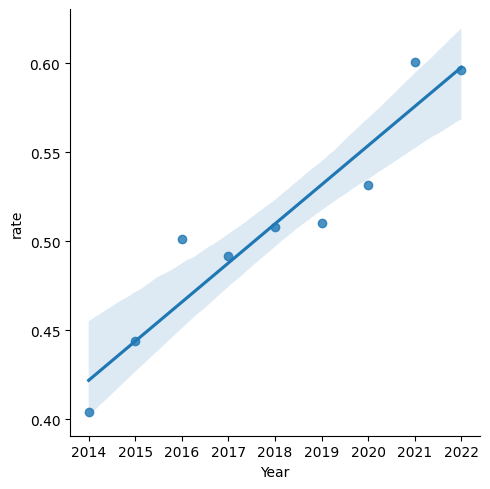

In [25]:
# Draw the linear regression
sns.lmplot(x="Year", y="rate", data=all_adoption,fit_reg=True) 

In [26]:
# Summary the data
ols(formula = "rate ~ Year", data = all_adoption).fit().params

Intercept   -43.852134
Year          0.021983
dtype: float64

A linear regression shows that the adoption rate over all outcome types for all animals tends to increase over time, increasing by about 2.2% per year.

### Adopted Animal Type Distribution Across Time

In [27]:
# Count the adopted animal based on Animal Type and group by year
diff_animal_adopt = all_trend[all_trend['Outcome Type'] == 'Adoption'].groupby(['Animal Type','Year'])\
['Animal ID'].count().reset_index(name="count")

# Calculate animal distribution each year 
all_adoption['cat_rate'] = diff_animal_adopt[diff_animal_adopt['Animal Type'] == 'Cat']['count'] \
/ all_adoption['count']
all_adoption['dog_rate'] = diff_animal_adopt[diff_animal_adopt['Animal Type'] == 'Dog']['count'].to_numpy() \
/ all_adoption['count'].to_numpy()
all_adoption['other_rate'] = diff_animal_adopt[diff_animal_adopt['Animal Type'] == 'Other']['count'].to_numpy() \
/ all_adoption['count'].to_numpy()

Text(0, 0.5, 'percent')

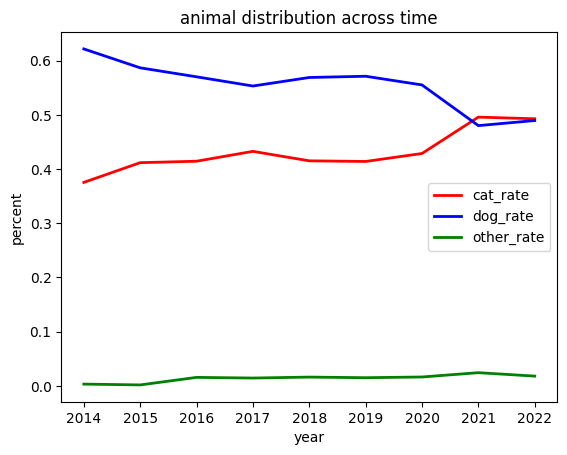

In [28]:
# plot the graph
fig, ax = plt.subplots()

# show cats percentage over all adopted animal across time
all_adoption.plot.line(ax = ax, x ='Year', y = 'cat_rate', color = 'r', linewidth= 2, linestyle = 'solid')

# show dogs percentage over all adopted animal across time
all_adoption.plot.line(ax = ax, x ='Year', y = 'dog_rate', color = 'b', linewidth= 2, linestyle = 'solid')

# show other animals percentage over all adopted animal across time
all_adoption.plot.line(ax = ax, x ='Year', y = 'other_rate', color = 'g', linewidth= 2, linestyle = 'solid')

# Add title and labels
plt.title('animal distribution across time')
plt.xlabel('year')
plt.ylabel('percent')

From the figure, we can see that the proportion of cats and other animals in the total adopted animals is increasing year by year, while the proportion of adopted dogs in the total adopted animals is decreasing year by year. Between 2021 and 2022, cat adoptions will surpass dog adoptions as the most popular animal to adopt

## Part 3 : Data Visualization and Analysis for Cats

### Adopted Cats Over  Time

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Number of Adopted Cats by Year'}, xlabel='Outcome Year', ylabel='Counts'>

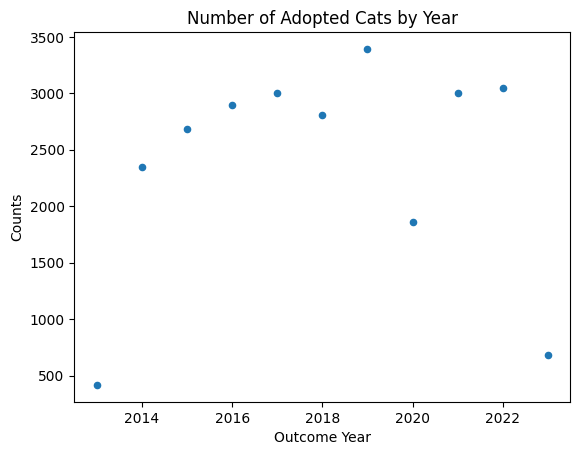

In [29]:
# Count the number of adopted cats in each year 
cat_table['Outcome Year'] = cat_table['Outcome Date'].dt.year
cat_adoption= cat_table[cat_table['Outcome Type'] == 'Adoption'].copy()
cat_counts = cat_adoption.groupby('Outcome Year').size().reset_index(name='Counts')
cat_counts.plot.scatter(x='Outcome Year', y='Counts', title='Number of Adopted Cats by Year')

### Number of Cats Over Time

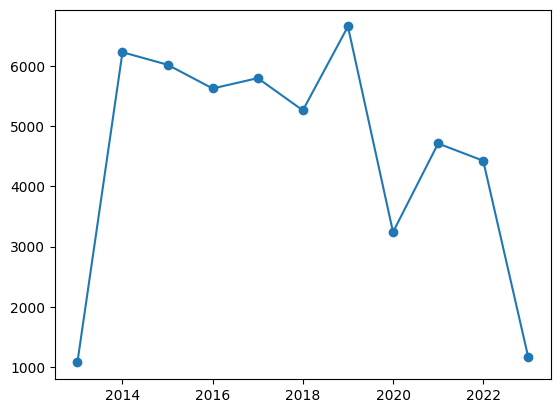

In [30]:
total_cats_by_year = cat_table.groupby('Outcome Year')['Animal ID'].count()
plt.plot(total_cats_by_year.index, total_cats_by_year.values, '-o')

Based on the plot, we can see that the total number of cats in the shelter is decreasing with time. If we ignore the data of 2013 and 2022 due to incompleteness and 2020 due to the pandemic, the trend is more clear. On the other hand, the number of adopted cats does not decrease, hence we are able to predict that the adoption rate is increasing over time.

### Adoption Rate of Cats Over Time

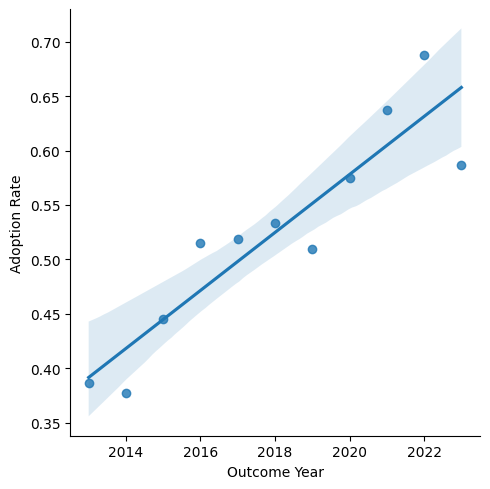

In [31]:
total_cats_by_year = cat_table.groupby('Outcome Year')['Animal ID'].count()
adoption_by_year = cat_table[cat_table['Outcome Type'] == 'Adoption'].groupby('Outcome Year')['Animal ID'].count()
adoption_rate_by_year = adoption_by_year / total_cats_by_year
adoption_rate_by_year = adoption_rate_by_year.reset_index(name='Adoption Rate')
sns.lmplot(x="Outcome Year", y="Adoption Rate", data=adoption_rate_by_year)

As expected, the adoption rate is increasing over time based on this plot. The regression line could help us visualize the change in the adoption rate.

### Number of Cats Based on Sex

<AxesSubplot: xlabel='Outcome Sex'>

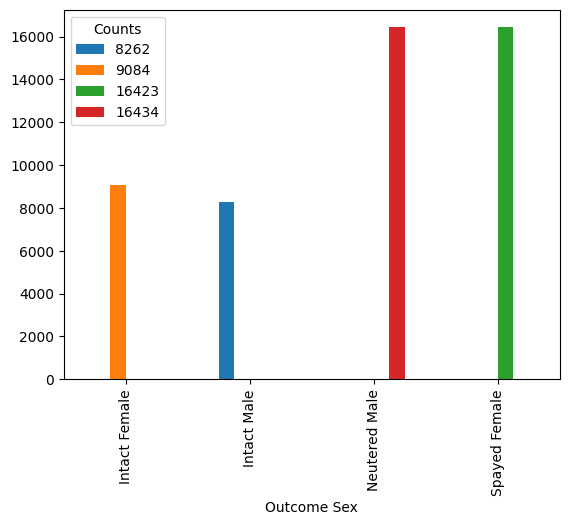

In [32]:
cat_sex_counts = cat_table.groupby(['Outcome Sex']).size().reset_index(name='Counts')
cat_sex_counts_pivot = cat_sex_counts.pivot(index='Outcome Sex', columns='Counts', values='Counts')
cat_sex_counts_pivot.plot(kind='bar')

We think it is interesting to explore if the adoption rate is affected by gender. In this plot, it is clear that there is no bias between female and male cats, but there are more neutered males and spayed females than intact cats. 

### Adoption Rate of Cats Based on Sex

<AxesSubplot: xlabel='Outcome Sex'>

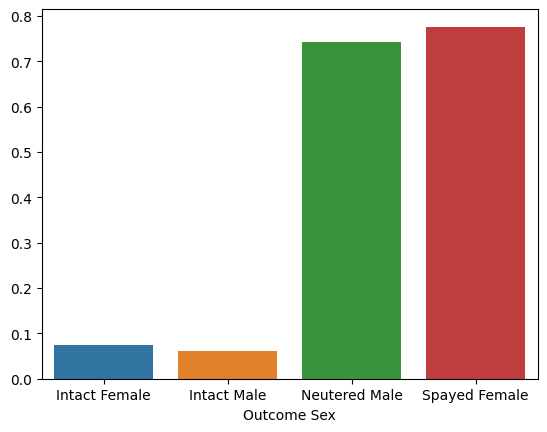

In [33]:
cat_sex_counts = cat_table.groupby(['Outcome Sex']).size().reset_index(name='Counts')
cat_sex_counts = cat_sex_counts.set_index('Outcome Sex')
adoption_by_sex = cat_table[cat_table['Outcome Type'] == 'Adoption'].groupby('Outcome Sex')['Animal ID'].count()
adoption_rate_by_sex = adoption_by_sex / cat_sex_counts['Counts']
sns.barplot(x=adoption_rate_by_sex.index, y=adoption_rate_by_sex.values)

People would love to adopt neutered cats. It is a fair point since neutered cats are less likely to roam and fight, reducing the risk of injuries and infections.

### Top Breeds of Adopted Cats

In [34]:
cat_breed_counts = cat_table[cat_table['Outcome Type'] == 'Adoption'].groupby(['Breed']).size().reset_index(name='Counts')
cat_breed_counts.sort_values(by=['Counts'], ascending=False).head()

,Breed,Counts
33,Domestic Shorthair Mix,13944
32,Domestic Shorthair,7350
28,Domestic Medium Hair Mix,1500
27,Domestic Medium Hair,769
25,Domestic Longhair Mix,767


### The most common color of Adopted cats

In [35]:
cat_color = cat_table[cat_table['Outcome Type'] == 'Adoption'].groupby(['Color']).size().reset_index(name='Counts')
cat_color.sort_values(by=['Counts'], ascending=False).head()


,Color,Counts
43,Brown Tabby,3965
4,Black,3270
19,Black/White,2394
56,Brown Tabby/White,2067
118,Orange Tabby,1874


It is harder to analyze the breeds and colors of adopted cats. Here we find the top five breeds and colors of all adopted cats but whether the adoption rate is affected is not clear. The number of total breeds or colors both exceeds 1000 kinds.

## Part 4 : Data Visualization and Analysis for Dogs

### Dogs Over Time

The dataset only includees the data from Oct 2013 to Apr 2023. We decided to drop the data for year 2013 and year 2023 in overcomes trends graph, because they only have partial month data (incomplete).

In [36]:
# Create a new column 'year' to determine which year that dog left the center
dog_table['Year'] = dog_table['Outcome Date'].dt.year
dog_trend = dog_table.copy()

# Drop data before 1/1/2014 and data after 12/31/2022
dog_trend.drop(dog_trend[(dog_trend['Outcome Date'].dt.date < datetime.date(2014, 1, 1)) | \
                        (dog_trend['Outcome Date'].dt.date > datetime.date(2022, 12, 31)) \
                        ].index, inplace=True)

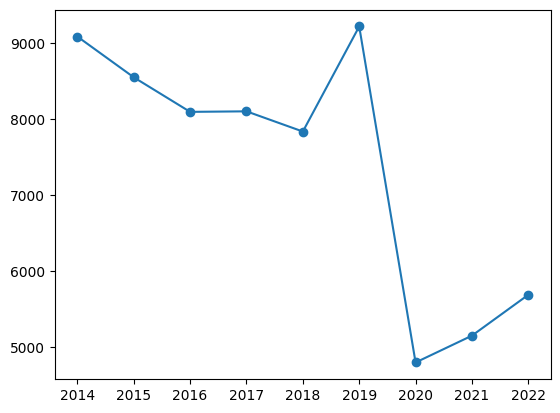

In [37]:
# Count the dogs group by year
dog_total = dog_trend.groupby('Year')['Animal ID'].size().reset_index(name='Counts')

# plot the graph
plt.plot(dog_total['Year'], dog_total['Counts'], '-o')

The number of dogs leaving the center has same trend to the overall data, that the number of dogs leaving the center decrease over time, especially between 2019 and 2020. This may be affected by the pandemic.
Although the number of dogs has rebounded in 2018-2019 and after 2021 (probably related to the control of the epidemic), the overall the number of dogs is gradually decreasing. 

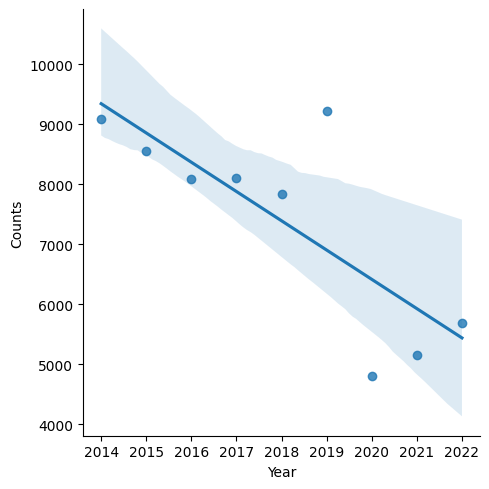

In [38]:
# Draw linear regresssion
sns.lmplot(x='Year',y='Counts',data=dog_total,fit_reg=True) 

In [39]:
# Summary the data
ols(formula = "Counts ~ Year", data = dog_total).fit().params

Intercept    992177.111111
Year           -488.000000
dtype: float64

Linear regression shows a negative relationship between numbers of dogs that left the center and time, that the number of dogs leaving the center has decreased over time by about 488 per year

### Adopted Dogs Over Time

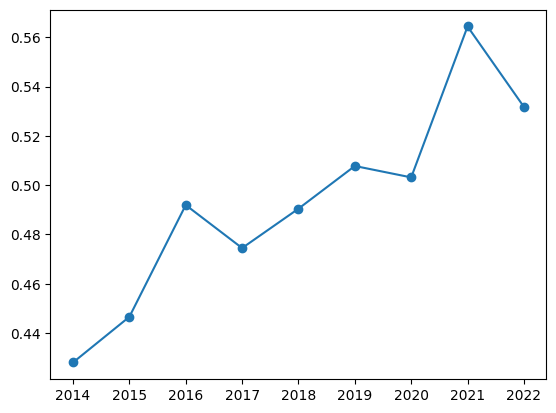

In [40]:
# filter the data, show adopted dog only
dog_adoption= dog_trend[dog_trend['Outcome Type'] == 'Adoption'].copy()

# Count the adopted dogs group by year
dog_counts = dog_adoption.groupby('Year').size().reset_index(name='Counts')

# Calculate the adopte rate over all outcome types 
dog_counts['rate'] = dog_counts['Counts'] / dog_total['Counts']

# Draw the graph
plt.plot(dog_counts['Year'], dog_counts['rate'], '-o')

The proportion of dogs adopted over all outcome type has increased over years, especially in 2015-2016 and 2020-2021. There has been a sharply decline in adoptions rate after 2021

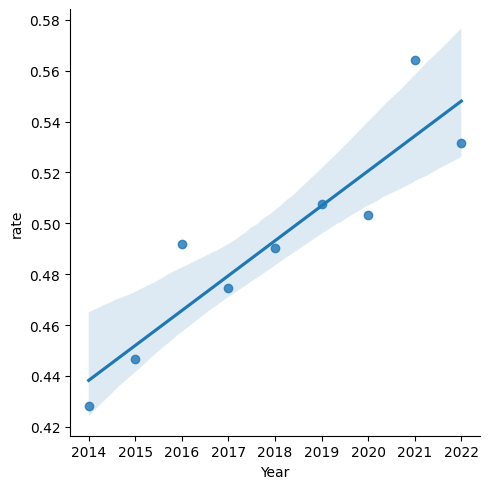

In [41]:
# Draw the linear regression
sns.lmplot(x="Year", y="rate", data=dog_counts,fit_reg=True) 

In [42]:
# Summary the data
ols(formula = "rate ~ Year", data = dog_counts).fit().params

Intercept   -27.216504
Year          0.013731
dtype: float64

A linear regression shows that the adoption rate over all outcome types for dogs tends to increase over time, increasing by about 1.3% per year (0.9% less than than overall data).

### Adopted Dogs Gender Distribution

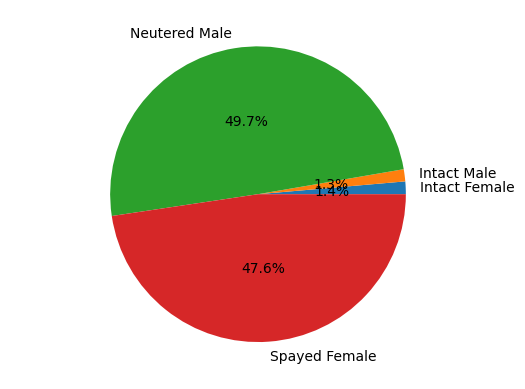

In [43]:
# Count the adopted dogs based on outcome sex
count_ds = dog_adoption.groupby(['Outcome Sex'])['Outcome Sex'].count().reset_index(name='percentage')

# Draw pie chart (show percentage)
fig, ax = plt.subplots()
ax.axis('equal')

patches, texts, autotexts = ax.pie(count_ds['percentage'], 
                              labels=count_ds['Outcome Sex'],
                              autopct='%1.1f%%', 
                              pctdistance=0.5, 
                              labeldistance=1.1)

About 97 percent of animals are neutered before adoption (1% higher than overall adopted animals). 51% of the adopted dogs are males (1% higher than overall adopted animals)) and 49% are females (1% lower than overall adopted animals). This means that people are largely more likely to adopt neutered dogs and slightly more likely to adopt male dogs

### Adopted Dogs Age Distribution

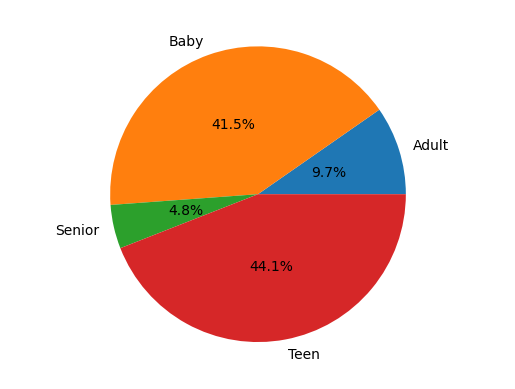

In [44]:
# Count the adopted dogs based on age gropu
count_ds = dog_adoption.groupby(['Age Group'])['Age Group'].count().reset_index(name='percentage')

# Draw pie chart (show percentage)
fig, ax = plt.subplots()
ax.axis('equal')

patches, texts, autotexts = ax.pie(count_ds['percentage'], 
                              labels=count_ds['Age Group'],
                              autopct='%1.1f%%', 
                              pctdistance=0.5, 
                              labeldistance=1.1)

The graph above shows that more than 86% of the animals that been adopted are baby/teen (2% lower than overall adopted animals). 44.1% of them are teen (11.9% lower than overall adopted animals). This shows that people prefer to adopt young dogs. 
Relative to animals adopted overall, dogs are more popular to be adopted as teenagers than as babies

### Top 5 Breeds for Adopted Dogs

In [45]:
# Count the adopted dogs based on breed
dog_breed = dog_adoption.groupby(['Breed']).size().reset_index(name='Counts')

# Count how many different breeds are there
dog_breed.size

3546

There are about 3546 different breeds/mix breeds among adopted dogs. This means that the types of dogs that are adopted are diverse

In [46]:
# calculate adopted dog's breed distribution
dog_breed['rate'] = dog_breed['Counts'] / dog_adoption.size

# Sort the table by count in desc order, and show top 5 rows 
dog_breed.sort_values(by=['Counts'], ascending=False).head()

,Breed,Counts,rate
1080,Labrador Retriever Mix,3425,0.006605
1344,Pit Bull Mix,2879,0.005552
582,Chihuahua Shorthair Mix,2728,0.005261
874,German Shepherd Mix,1547,0.002983
1343,Pit Bull,922,0.001778


Based on the table above, we can see that Labrador Retriever Mix, Pit Bull Mix, Chihuahua Shorthair Mix, German Shepherd Mix and Pit Bull are the most popular breeds for adopting dogs in Texas. But the proportion of these breeds is very small (accounts for less than 1% of all adopted dogs)

### Most Common Color for Adopted Dogs

In [47]:
# Count the adopted dogs based on color
dog_color = dog_adoption.groupby(['Color']).size().reset_index(name='Counts')

# Count how many different colors are there
dog_color.size

600

There are about 600 different colors/color combinations among adopted dogs. This means that adopted dogs come in a variety of colors

In [48]:
# calculate adopted dog's color distribution
dog_color['rate'] = dog_color['Counts'] / dog_adoption.size

# Sort the table by count in desc order, and show top 5 rows 
dog_color.sort_values(by=['Counts'], ascending=False).head()

,Color,Counts,rate
35,Black/White,4097,0.007901
113,Brown/White,1860,0.003587
244,Tan/White,1746,0.003367
3,Black,1557,0.003003
262,White,1453,0.002802


Based on the table above, we can see that black/white, brown/white, tan/white, black and white are the most popular colors for adopting dogs in Texas. But the proportion of these colors is very small (accounts for less than 1% of all adopted dogs)

## Part 5 : Data Visualization and Analysis for Other Animal Types

### Total Number of Other Animal Types

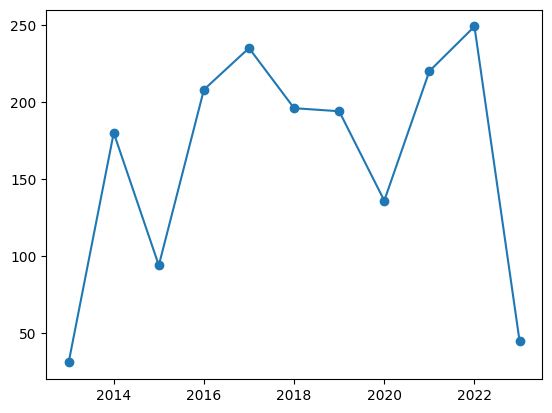

In [49]:
other_table['Outcome Year'] = other_table['Outcome Date'].dt.year
total_other_by_year = other_table.groupby('Outcome Year')['Animal ID'].count()
plt.plot(total_other_by_year.index, total_other_by_year.values, '-o')

This plot shows the total number of other animals over time, but there is no obvious trend or useful information inside.

### Adoption Rate

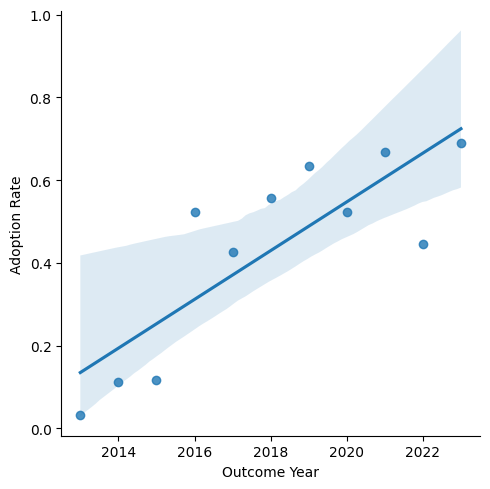

In [60]:
other_adoption_by_year = other_table[other_table['Outcome Type'] == 'Adoption'].groupby('Outcome Year')['Animal ID'].count()
other_adoption_rate_by_year = other_adoption_by_year / total_other_by_year
other_adoption_rate_by_year = other_adoption_rate_by_year.reset_index(name='Adoption Rate')
sns.lmplot(x="Outcome Year", y="Adoption Rate", data=other_adoption_rate_by_year)

This plot shows that the adoption rate of other animals is also increasing over time.

### Distribution of Animals

In [59]:
animal_counts = other_table.groupby('Breed')['Animal ID'].count().reset_index(name='counts')
animal_counts.sort_values(by=['counts'], ascending= False).head()

,Breed,counts
64,Guinea Pig,283
123,Rabbit Sh Mix,185
122,Rabbit Sh,161
24,Chicken,132
25,Chicken Mix,106


There are large various numbers of species, the top animals in the shelter are Guinea pigs, Rabbits, and chickens. It may provide useful insight to people about the potential animals which may be adopted more and more. 

## Part 6: Death Rate over Time

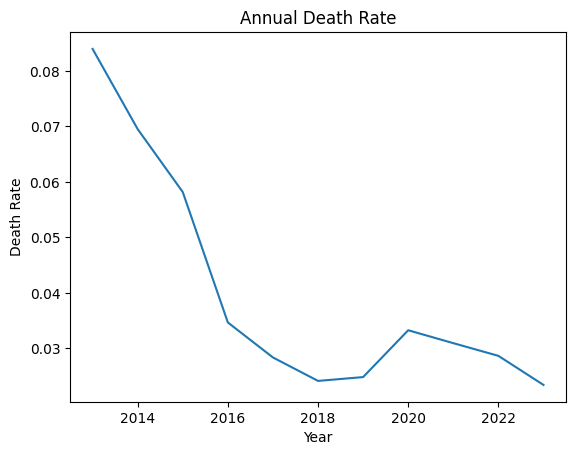

In [50]:
outcome_counts = overall.groupby(['Year', 'Outcome Type']).size().reset_index(name='outcome')
death_counts= outcome_counts.loc[outcome_counts['Outcome Type'].isin(['Died', 'Euthanasia']), ['Year', 'outcome']].groupby('Year').sum()
total_counts = outcome_counts.groupby('Year')['outcome'].sum()
death_rates = death_counts['outcome'] / total_counts
death_rates_df = pd.DataFrame({'year': death_rates.index, 'death_rate': death_rates.values})
plt.plot(death_rates_df['year'], death_rates_df['death_rate'])
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.title('Annual Death Rate')
plt.show()

From the plot, we can see that there is a downward trend in the annual animal death rate in the animal center. However, the death rate does increase during the covid period.

## Part 7: Conclusion

This data science project aims to analyze animal adoption trends in Austin, Texas using data from data.austintexas.gov. The project uses data from two tables, intakes and outcomes, and merges them by inner join using a unique key 'Animal ID'. The data is then tidied, with unnecessary columns dropped, null/unknown values eliminated, and replicate rows deleted. A new column is created to categorize the age group of cats and dogs.

The project analyzes the overall animal adoption trends in Texas, and how they vary based on factors such as the type of animal, location, and adoption process. The project found that there is a downward trend in the number of animals in the center.

Moreover, the project analyzed the adoption trends for cats and dogs, which showed an increasing trend in the adoption rate. The adoption rate is also shown to be increasing over time based on linear regression. The project also explored whether the adoption rate is affected by gender, and found no bias between female and male cats, but people prefer to adopt neutered cats and dogs.

Additionally, the analysis of the data indicates that the death rate for animals has been decreasing over time, which is a positive trend for animal welfare. This trend can be attributed to the efforts made by animal welfare organizations to promote adoption, spaying/neutering, and other measures to reduce the number of animals that are euthanized. The calculations show that the death rate was higher in earlier years and has decreased steadily since then. Furthermore, the graph of the annual death rate clearly shows a downward trend over time.

Based on these findings, we can conclude that animal adoption trends in Austin, Texas are affected by various factors, such as the breeds of animals, genders, and adoption process. The pandemic has also had an impact on animal adoption rates. The findings suggest that efforts should be made to promote animal adoption and neutering to improve animal welfare in the state.

## Part 8: Other Relate Resources 

1. PetSmart Charities - PetSmart Charities is a non-profit organization that provides funding and support to animal welfare organizations across North America. Their website provides information on animal adoption trends and resources for pet owners.

2. Petfinder - Petfinder is an online database of adoptable pets from over 11,000 animal shelters and rescue groups across North America. Their website provides information on animal adoption trends, as well as resources for pet owners.

3. Animal Welfare Institute - The Animal Welfare Institute is a non-profit organization dedicated to reducing animal suffering. Their website provides information on animal welfare issues, as well as resources for pet owners.